The purpose of this notebook is to explore the drfit skill score senstivity to windage value for the STC500 and CIOPSE models.

Drift simulations with windage from 0.0, 0.1, 0.2, ...., 1.5 were performed.

All observed drifters used in this evaluaion were the CODE-Davis type. The literature suggests the windage for this drifter is between 0.5% and 1%.
* https://www.mdpi.com/1424-8220/22/1/353
* https://journals.ametsoc.org/view/journals/atot/37/11/jtechD200013.xml

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_dir='/home/soontiensn/data/gpsc-work7/adam/wind-sensitivity/all_windage/'

In [3]:
def load_data(model, score, hour):
    fname = os.path.join(data_dir, model, 'plots',
                         'windage0.0-windage0.1-windage0.2-windage0.3-windage0.4-windage0.5-windage0.6-windage0.7-windage0.8-windage0.9-windage1.0-windage1.1-windage1.2-windage1.3-windage1.4-windage1.5',
                         'summary_stats_tables',
                         f'Average_{score}_at_{hour}h.csv')
    df = pd.read_csv(fname,index_col=0)
    return df

In [4]:
df = load_data('STC500', 'Liu', '24')

In [5]:
def scatter_score(ax, model, score, hour):
    df = load_data(model, score, hour)
    
    #build windages
    windages=[]
    for w in df.columns:
        windage = float(w.split('_')[-1])
        windages.append(windage)
        
    # gather scores
    scores = df.iloc[0, :].values
    
    # plot 
    ax.plot(windages, scores,'-o',label=model)
    

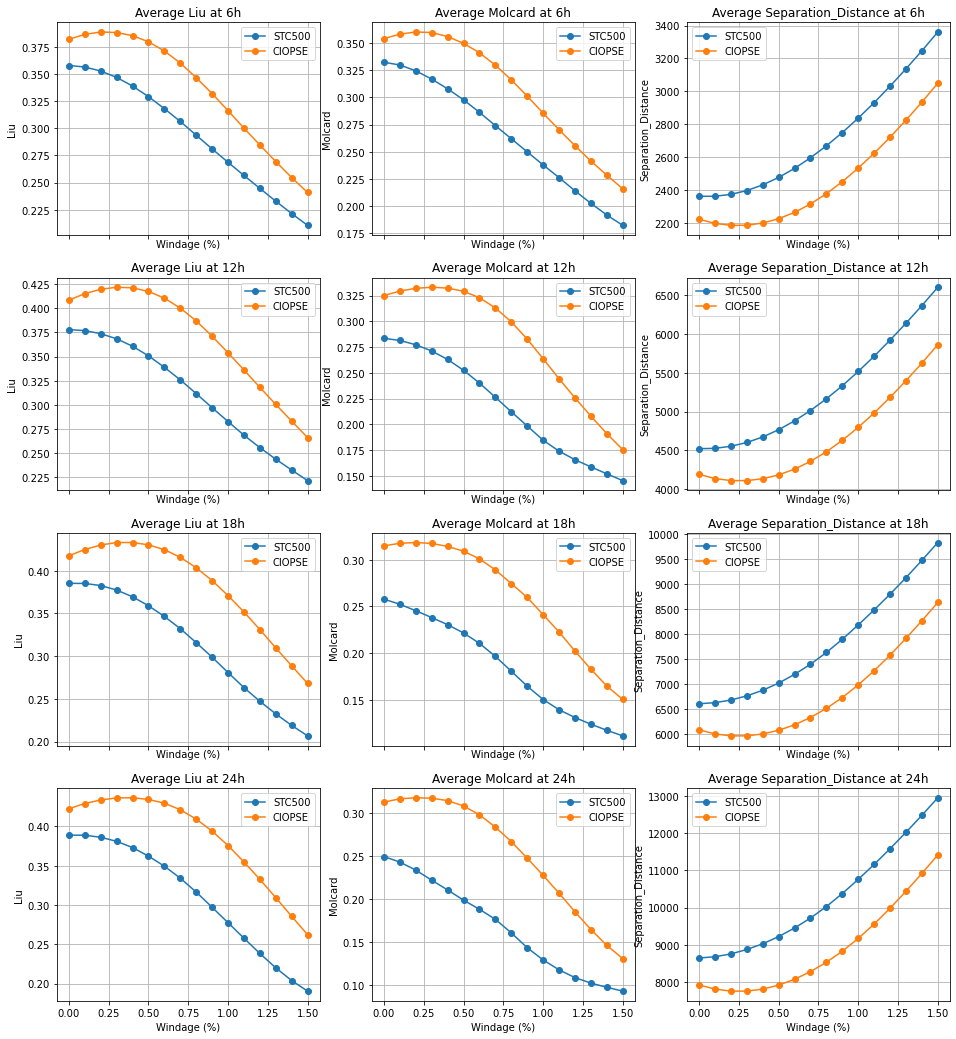

In [6]:
fig, axs = plt.subplots(4,3, figsize=(16,18), sharex=True)
for score, ax_rows in zip(['Liu', 'Molcard', 'Separation_Distance'], axs.T):
    for hour, ax in zip(['6', '12', '18', '24'], ax_rows):

        for m in ['STC500', 'CIOPSE']:
            scatter_score(ax,m, score, hour)
        ax.set_ylabel(score)
        ax.set_xlabel('Windage (%)')
        ax.set_title(f'Average {score} at {hour}h')
        ax.legend()
        ax.grid()

# summary
* For STC500, windage=0 gives the best skill across all metrics and lead hours
* For CIOPSE, a windage closer to 0.25% to 0.5% gives the best skill for most metrics and lead hours.

